In [1]:
import numpy as np
from sklearn.metrics import (roc_auc_score, mean_absolute_error, 
mean_squared_error, average_precision_score, confusion_matrix,
classification_report)
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import random
from sklearn import svm, datasets

In [12]:
df = pd.read_csv('https://bidtime.s3.amazonaws.com/Avazu/train/avazu_sample_10k.csv')

In [13]:
selected_columns =['C1','site_domain','app_id','app_domain','site_category','banner_pos','device_type','device_conn_type','C14','C15','C16','C17','C18','C19']
# Please put your code here to define the data matrix X and y
X = df.loc[:,selected_columns]
y = df.click

In [14]:
Xnew= pd.get_dummies(X)
Xnew.as_matrix()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[1005,    0,    1, ...,    0,    1,    0],
       [1005,    0,    1, ...,    0,    0,    0],
       [1005,    0,    1, ...,    0,    0,    0],
       ...,
       [1005,    0,    1, ...,    0,    0,    0],
       [1005,    0,    1, ...,    0,    0,    0],
       [1005,    0,    1, ...,    0,    0,    0]])

In [15]:
Xnew.head()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,...,site_category_70fb0e29,site_category_72722551,site_category_75fa27f6,site_category_76b2941d,site_category_8fd0aea4,site_category_a818d37a,site_category_c0dd3be3,site_category_dedf689d,site_category_f028772b,site_category_f66779e6
0,1005,0,1,0,15704,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,1,0
1,1005,0,1,0,19743,320,50,2264,3,427,...,0,0,0,0,0,0,0,0,0,0
2,1005,0,1,0,18993,320,50,2161,0,35,...,0,0,0,0,0,0,0,0,0,0
3,1005,0,1,0,15701,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
4,1005,0,1,0,15704,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.30, random_state=50)

              precision    recall  f1-score   support

           0       0.89      0.59      0.71      2474
           1       0.26      0.66      0.37       527

   micro avg       0.60      0.60      0.60      3001
   macro avg       0.57      0.63      0.54      3001
weighted avg       0.78      0.60      0.65      3001

0.19206671597729055
[[1462 1012]
 [ 179  348]]
Normalized confusion matrix
[[0.59094584 0.40905416]
 [0.33965844 0.66034156]]


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


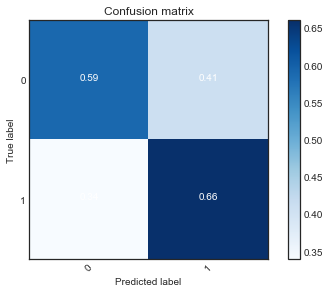

In [18]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import svm
from sklearn import preprocessing

%matplotlib inline
plt.style.use('seaborn-white')

clf = svm.LinearSVC(class_weight='balanced')
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)


clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
print(classification_report(y_test,y_pred))
print(matthews_corrcoef(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)
plt.show();




In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

Cs = [0.01,0.1,1,10,100,1000]
parameters = {'C':Cs}

svc = LinearSVC(penalty='l1', dual = False)
clf_regsvm = GridSearchCV(svc, parameters,return_train_score=True)
clf_regsvm.fit(X_train, y_train)
print('best parameters:',clf_regsvm.best_params_,',testing accuracy:',clf_regsvm.best_estimator_.score(X_test,y_test))
    
    

    


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the 

best parameters: {'C': 0.01} ,testing accuracy: 0.826057980673109


In [20]:
clf_l1= svm.LinearSVC(penalty= 'l1', dual = False, class_weight = 'balanced' , C=0.01)
clf_l1.fit(X_train, y_train)
y_predl1 = clf_l1.predict(X_test)
print(classification_report(y_test,y_predl1))
print(matthews_corrcoef(y_test,y_predl1))

              precision    recall  f1-score   support

           0       0.90      0.61      0.73      2474
           1       0.27      0.68      0.39       527

   micro avg       0.62      0.62      0.62      3001
   macro avg       0.58      0.64      0.56      3001
weighted avg       0.79      0.62      0.67      3001

0.2199117543570676


[[1508  966]
 [ 170  357]]
Normalized confusion matrix
[[0.60953921 0.39046079]
 [0.32258065 0.67741935]]


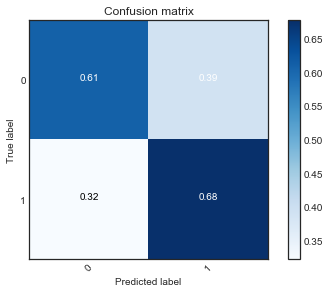

In [21]:
cm = confusion_matrix(y_test, y_predl1)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)
plt.show();


In [22]:
svc2 = svm.LinearSVC(penalty='l2')
clf_l2 = GridSearchCV(svc2, parameters,return_train_score=True)
clf_l2.fit(X_train, y_train)
print('best parameters:',clf_l2.best_params_,',testing accuracy:',clf_l2.best_estimator_.score(X_test,y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the 

best parameters: {'C': 0.1} ,testing accuracy: 0.8223925358213928


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [23]:
clf_l2= svm.LinearSVC(penalty= 'l2', class_weight = 'balanced' , C=0.01)
clf_l2.fit(X_train, y_train)
y_predl2 = clf_l2.predict(X_test)
print(classification_report(y_test,y_predl2))
print(matthews_corrcoef(y_test,y_predl2))

              precision    recall  f1-score   support

           0       0.91      0.57      0.70      2474
           1       0.26      0.72      0.39       527

   micro avg       0.60      0.60      0.60      3001
   macro avg       0.58      0.65      0.54      3001
weighted avg       0.79      0.60      0.65      3001

0.22109396265448553


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[1413 1061]
 [ 148  379]]
Normalized confusion matrix
[[0.57113985 0.42886015]
 [0.28083491 0.71916509]]


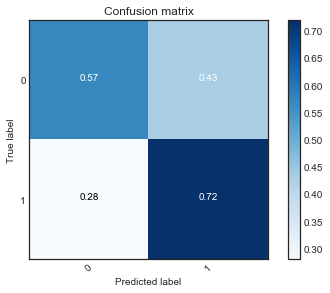

In [24]:
cm = confusion_matrix(y_test, y_predl2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)
plt.show();



In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.30, random_state=50)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[2449   25]
 [ 508   19]]
Normalized confusion matrix
[[0.98989491 0.01010509]
 [0.96394687 0.03605313]]


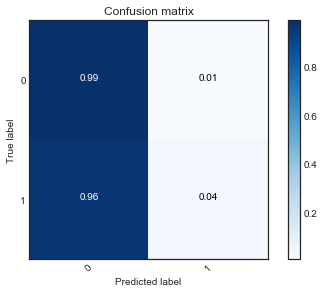

In [26]:
import sklearn.linear_model as skl_lm

clf = skl_lm.LogisticRegression(C=1e10,tol=1e-9)
# C is the inverse of regularization strength, here we don't need regularization since we have so many data
# Set it to very big 
clf.fit(X_train,y_train)
clf.coef_


from sklearn.metrics import confusion_matrix
import itertools

y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)


from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

def ROC(label,result):
    # Compute ROC curve and area the curve
    Y = np.array(label)
    fpr, tpr, thresholds = roc_curve(Y, result)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    #pl.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve : 0.688941


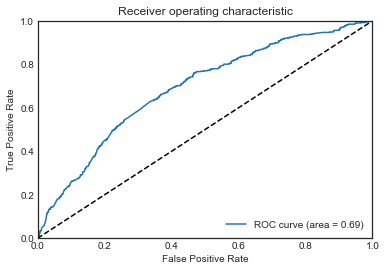

In [27]:
ROC(y_test,y_score)

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
print(classification_report(y_test,y_pred))

print(matthews_corrcoef(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2474
           1       0.43      0.04      0.07       527

   micro avg       0.82      0.82      0.82      3001
   macro avg       0.63      0.51      0.48      3001
weighted avg       0.76      0.82      0.76      3001

0.08214056378804802


In [29]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.31


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.31')

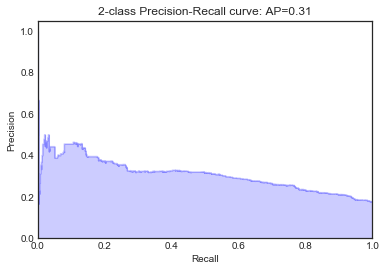

In [30]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [31]:
from sklearn.preprocessing import StandardScaler

# preprocess dataset, split into training and test part
XRF = StandardScaler().fit_transform(Xnew)
X_train, X_test, y_train, y_test = train_test_split(XRF, y, test_size=.4)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
from sklearn.ensemble import RandomForestClassifier


max_depth=[2,4,8,16,32,64]
ntrees = [4,8,16,32]
max_features = [0.1,0.2,0.3,0.5,0.9]
parameters = {'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features}


model =  RandomForestClassifier(max_depth=10, n_estimators=100, max_features=1)
clfRF = GridSearchCV(model, parameters,return_train_score=True)
clfRF.fit(X_train, y_train)
score = clfRF.score(X_test, y_test)
clfRF.fit(X_train, y_train)
print('Accuracy:{},Best parameters:{}, feature importance:{}'.format(score,clfRF.best_params_,clfRF.best_estimator_.feature_importances_))


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy:0.8185453636590853,Best parameters:{'max_depth': 4, 'max_features': 0.9, 'n_estimators': 32}, feature importance:[0.00000000e+00 0.00000000e+00 1.24394087e-03 8.41361381e-03
 2.59650591e-01 1.51474005e-02 2.03973043e-01 3.58469057e-02
 2.32854272e-02 4.98333322e-02 0.00000000e+00 0.00000000e+00
 2.29463749e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.42403120e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.57199975e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [33]:
clfRF = RandomForestClassifier(max_depth=16, n_estimators=32, max_features=.3)
clfRF.fit(X_train, y_train)
y_pred= clfRF.predict(X_test)

[[3210   59]
 [ 693   39]]
Normalized confusion matrix
[[0.98195167 0.01804833]
 [0.94672131 0.05327869]]


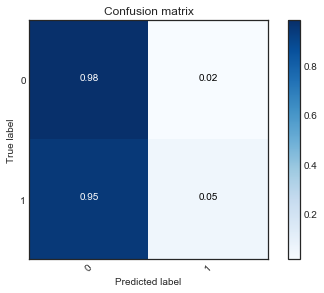

In [34]:
y_predRF = clfRF.predict(X_test)
cm = confusion_matrix(y_test, y_predRF)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)


from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

def ROC(label,result):
    # Compute ROC curve and area the curve
    Y = np.array(label)
    fpr, tpr, thresholds = roc_curve(Y, result)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    #pl.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve : 0.669251


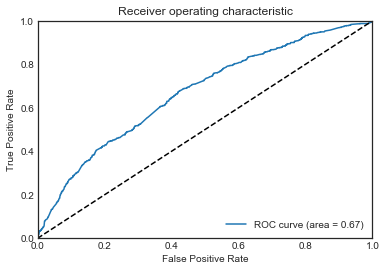

In [35]:
y_scoreRF = clfRF.predict_proba(X_test)[:,1]
ROC(y_test,y_scoreRF)